# Assignment Sheet 9
## Done by Nayan Man Singh Pradhan

# Implementing LDA

In [618]:
## Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import collections
from numpy.linalg import inv

In [619]:
## Main implemented functions

def get_max_arg(g_fn):
    max_arr = []
    for j in range(g_fn.shape[1]):
        max_temp = g_fn[0][j]
        max_index = 0
        for i in range(g_fn.shape[0]):
            if (g_fn[i][j]) > max_temp:
                max_temp = g_fn[i][j]
                max_index = i
        max_arr.append(max_index)
    return max_arr
        

def LDA(X, predict_x):
    
    ###
    
    N_g_list = []
    for i in range(len(X)):
        ind = int(X[i][-1])
        N_g_list.append(ind)
    N_g = collections.Counter(N_g_list)
    
    ###
    
    p_g = []
    for i in (N_g):
        p_g.append((N_g[i])/len(N_g_list))

    ###
    
    classes = []

    for i in (N_g):
        classes.append(i)

    ###
    
    x_y_split = [] 
    x_list = [[] for i in range(len(N_g))]

    for i in range(len(X)):
        x_y_split.append(np.split(X[i], [-1]))

    for j in range(len(X)):
        for k in range(len(classes)):
            if x_y_split[j][1] == classes[k]:
                x_list[k].append(x_y_split[j][0])

    x_list_store = x_list
    
    ###
    
    mean_list = []

    for counter, value in enumerate(N_g):
        mean = (1/N_g[value]) * (sum(x_list[counter]))
        mean_list.append(mean)

    ###
    
    coeff = 0

    x_list = x_list_store

    mean_list = np.array(mean_list)

    denominator = len(X) - len(classes)

    numerator = 0

    for class_index, class_value in enumerate(classes):
        x_minus_mean = []

        for x_val in x_list[class_index]:
            temp = x_val - mean_list[class_index]
            x_minus_mean.append(temp)

        x_minus_mean = np.array(x_minus_mean)
        numerator += np.dot(x_minus_mean.T, x_minus_mean)

    coeff = (numerator/denominator)
    
    ### 
    
    g_fn = []

    predict_x = np.array(predict_x)

    for class_index, class_value in enumerate(classes):
        _a = (np.log(p_g[class_index]))
        _b = np.dot(np.dot(predict_x, inv(coeff)), mean_list[class_index])
        _c = -(0.5*np.dot(np.dot((mean_list[class_index].T),(inv(coeff))), mean_list[class_index]))
        g_fn_class = _a + _b + _c
        g_fn.append(g_fn_class)
    
    g_fn = np.array(g_fn)
    argmax_val = get_max_arg(g_fn)

    classes_list = []
    for g in range(len(argmax_val)):
        classes_list.append(classes[argmax_val[g]])
        
    classes_list = np.array(classes_list)
    
    return (classes_list)

In [620]:
N = 30

np.random.seed(123)
X1 = np.random.multivariate_normal([1,1],[[1,0],[0,1]],N)
X1 = np.concatenate((X1,1.0*np.ones((N,1))),axis=1)
X2 = np.random.multivariate_normal([-1,-1],[[1,0],[0,1]],N)
X2 = np.concatenate((X2,2.0*np.ones((N,1))),axis=1)
X3 = np.random.multivariate_normal([2,0],[[1,0],[0,1]],N)
X3 = np.concatenate((X3,3.0*np.ones((N,1))),axis=1)

X = np.concatenate((X1,X2,X3));

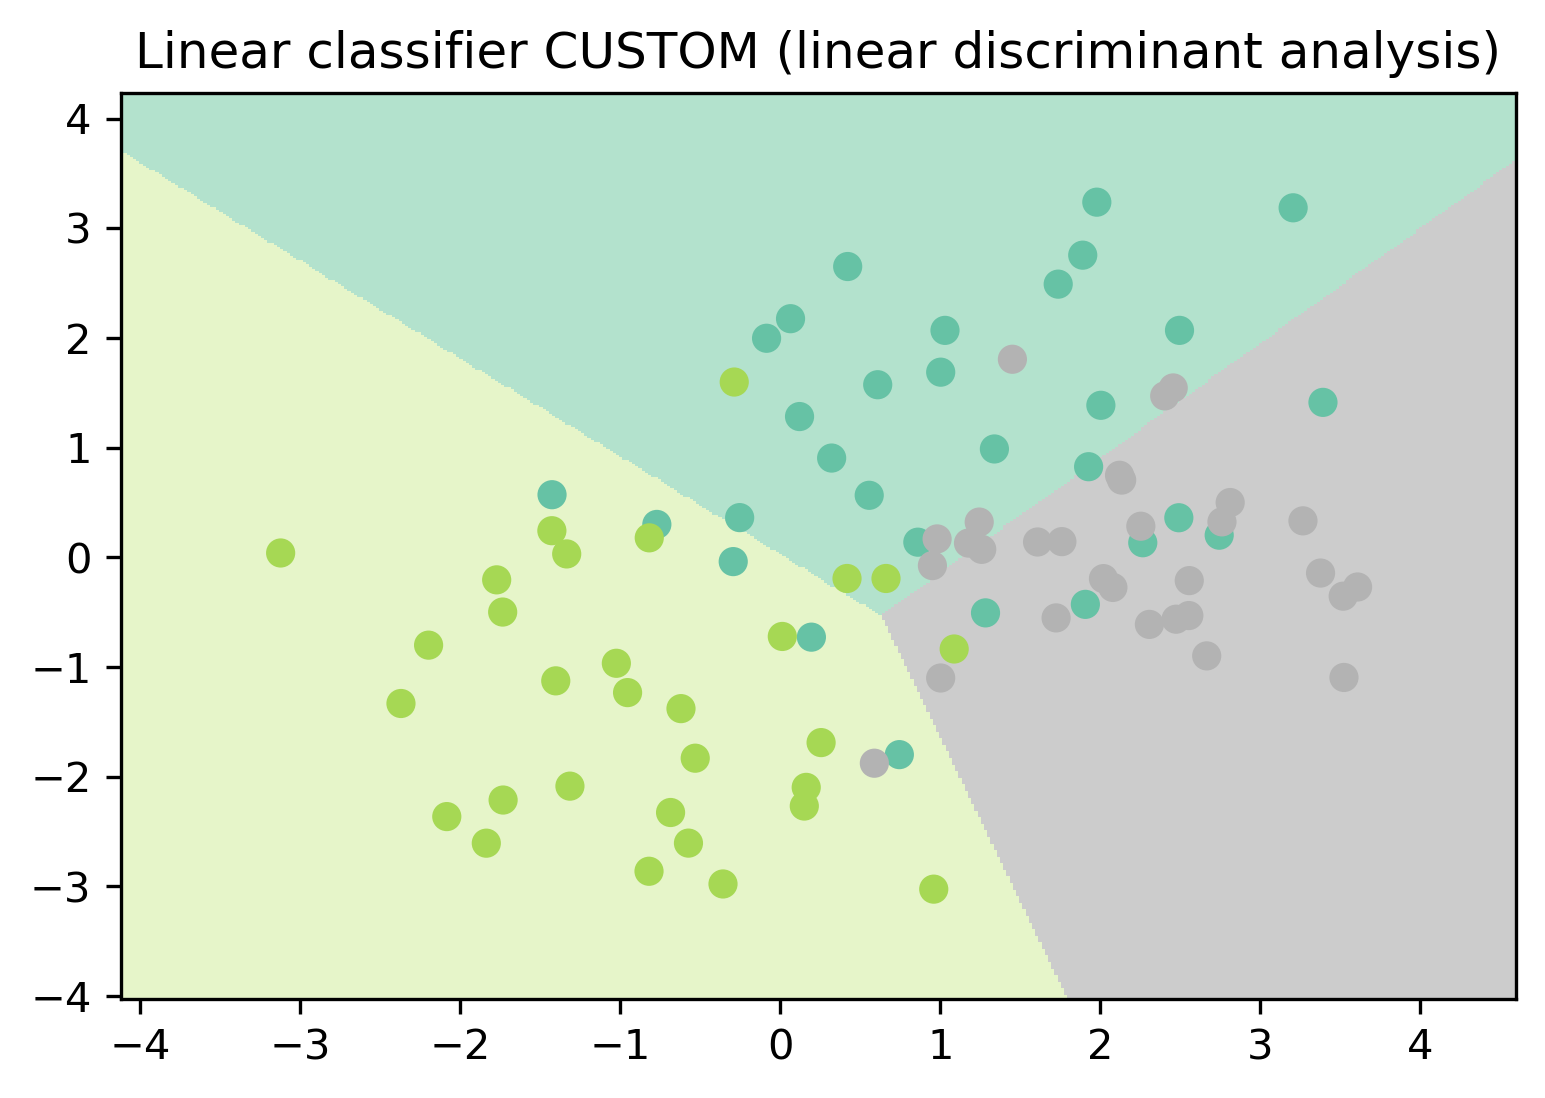

In [637]:
## Result from custom made LDA algorithm

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = LDA(X, np.c_[xx.ravel(), yy.ravel()]) ## LDA used here
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.pcolormesh(xx, yy, Z, cmap='Pastel2', shading='auto')

plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap='Set2');
plt.title("Linear classifier CUSTOM (linear discriminant analysis)")
plt.show()

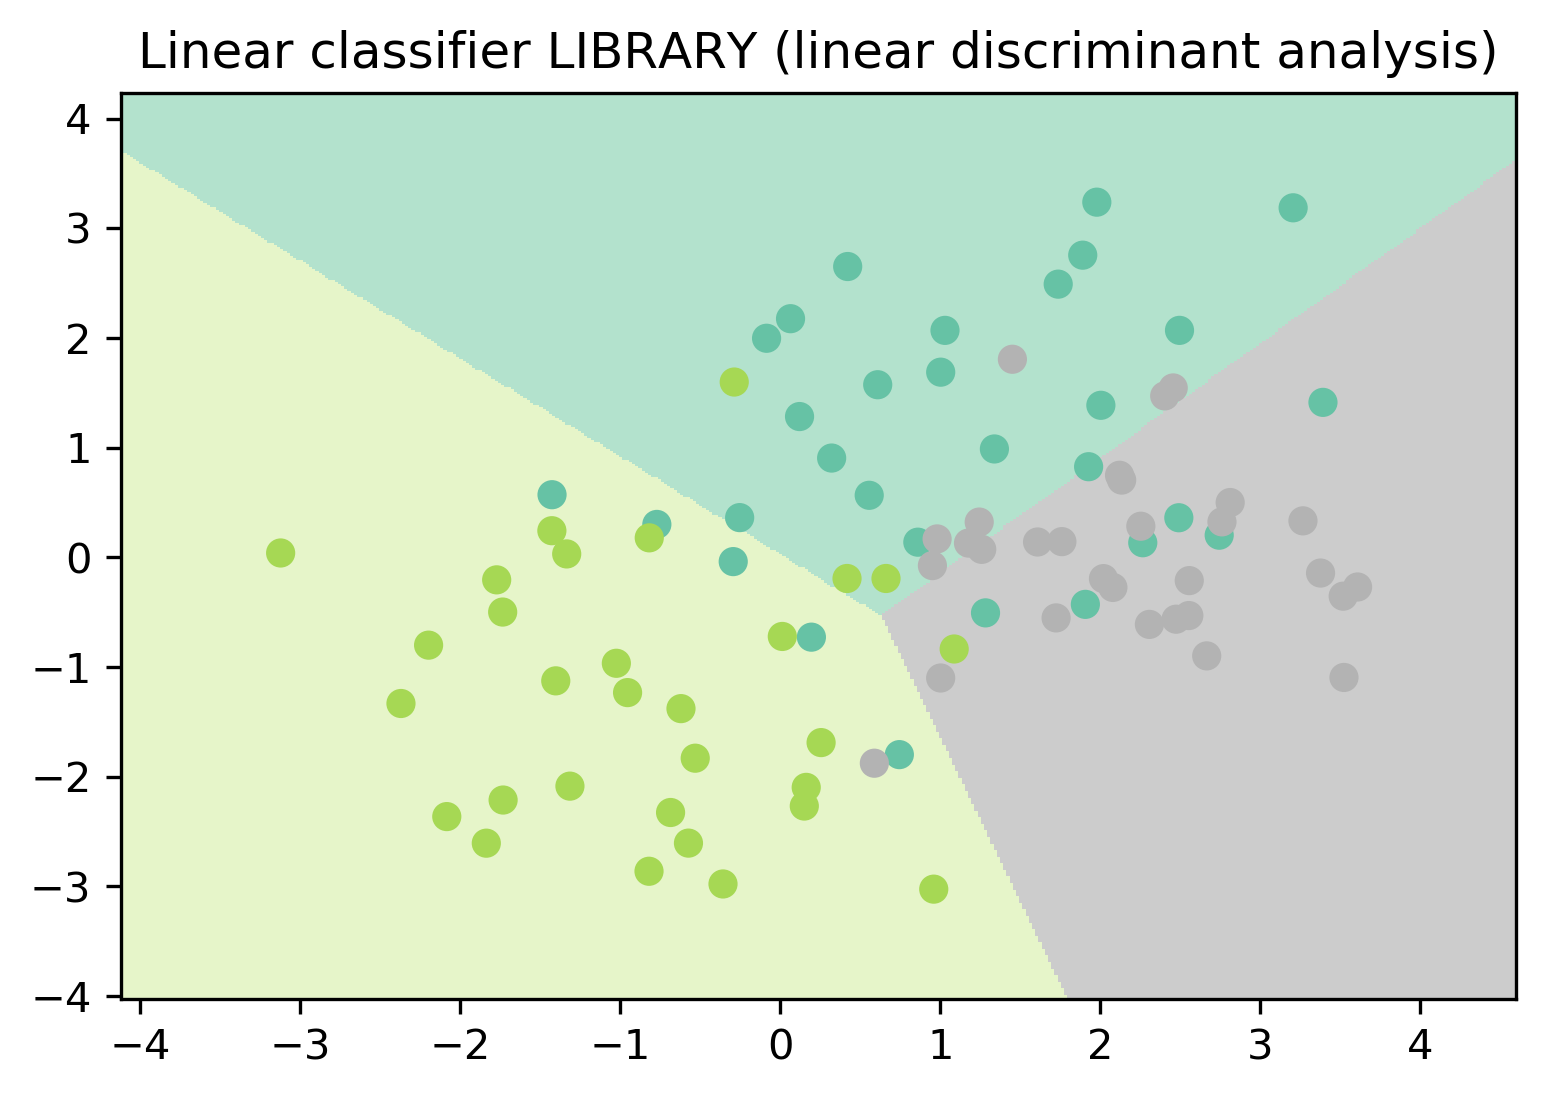

In [638]:
## Result from sklearn LDA library for comparison and reference

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis() 
lda.fit(X[:,[0,1]], X[:,2]) ## LDA train
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = lda.predict(np.c_[xx.ravel(), yy.ravel()]) ## LDA test
Z = Z.reshape(xx.shape)
plt.figure(dpi=300)
plt.pcolormesh(xx, yy, Z, cmap='Pastel2', shading='auto')

plt.scatter(X[:,0],X[:,1],c=X[:,2],cmap='Set2');
plt.title("Linear classifier LIBRARY (linear discriminant analysis)")
plt.show()

# Working with Spambase data

In [623]:
## loading data
raw_data = pd.read_csv('spambase/spambase.data', sep=',', header=None)

raw_data_x = np.array(raw_data.drop(raw_data.columns[57], 1))
raw_data_y = np.array(raw_data[57])

In [631]:
## 0-1 Loss Function
def LossFunction(actual, predicted):
#     print("Actual:", actual)
#     print("Predicted:", predicted)
    return_arr = []
    for i in range(len(actual)):
        if actual[i]==predicted[i]:
            return_arr.append(0)
        else:
            return_arr.append(1)
    return ((1/len(actual))*sum(return_arr))

In [632]:
## Random split into 1000 training samples and 100 validation samples
import random
random.seed(40)

## Code below insures 1100 unique random numbers
samples_index = random.sample(range(raw_data.shape[0]), 1100)

## Dividing into training set and validation set
training_samples_index = samples_index[:1000]
validation_samples_index = samples_index[1000:]

## Training set
training_set = []
training_set_x = []
training_set_y = []
for num_t in training_samples_index:
    training_set.append(raw_data.iloc[[num_t]])
    training_set_x.append(raw_data_x[num_t])
    training_set_y.append(raw_data_y[num_t])

## Validation set
validation_set = []
validation_set_x = []
validation_set_y = []
for num_v in validation_samples_index:
    validation_set.append(raw_data.iloc[[num_v]])
    validation_set_x.append(raw_data_x[num_v])
    validation_set_y.append(raw_data_y[num_v])

In [636]:
## Question has specified we can use Scikit Learn library

## Using LDA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis() 
lda.fit(training_set_x, training_set_y) ## LDA train
## Prediction via LDA for validation set
Prediction_LDA = lda.predict(validation_set_x)
LDA_Loss = LossFunction(validation_set_y, Prediction_LDA)
print("Generalization Error for LDA:", LDA_Loss)

## Using KNN with k=3 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_set_x, training_set_y) ## KNN train
## Prediction via KNN with k=3 for validation set
Prediction_KNN = knn.predict(validation_set_x)
KNN_Loss = LossFunction(validation_set_y, Prediction_KNN)
print("Generalization Error for KNN with k=3:", KNN_Loss)

Generalization Error for LDA: 0.12
Generalization Error for KNN with k=3: 0.3
